# TABLE OF CONTENTS
1. [PROBLEM STATEMENT](#prob-stat)
2. [THE DATA](#data)
    1. [Supplemental Data - Olympic](#supdata-olympic)
3. [BACKGROUND AND FINDING](#finding)
4. [READ IN THE DATA](#read)
    1. [Reading .csv files](#read_csv)
    2. [Reading .txt files](#read_txt)
        1. [Data Selection](#select_survey)
5. [GETTING TO KNOW THE DATA](#know)
6. [DATA PREPARATION](#prepare)
    1. [SAT Results](#sat1)
        1. [Data Selection](#select_sat)
        2. [Data Conversion](#convert_sat)
        3. [Create Overall SAT Score Avg. Column](#create_col_sat)
    2. [High School Directory](#hs1)
        1. [Rename Key Column](#rename_col_hs)
        2. [Data Selection](#select_hs)
        3. [Create Latitude and Longitude Columns](#create_col_hs)
    3. [AP Exam Results](#ap1)
        1. [Data Selection](#select_ap)
    4. [Class Size](#class1)
        1. [Data Selection](#select_class)
        2. [Create Key Column](#create_col_class)
    5. [Demographics](#demo1)
        1. [Data Selection](#select_demo)
    6. [Graduation Outcomes](#grad1)
        1. [Data Selection](#select_grad)
        2. [Move Key Column](#move_col_grad)
    7. [Survey](#survey1)
        1. [Rename Key Column](#rename_col_survey)
7. [GETTING READY TO COMBINE THE DATASETS](#combine_ready)
    1. [AP Exam Results](#ap2)
        1. [Verify Combine Key](#verify_key_ap)
    2. [Class Size](#class2)
        1. [Data Exploration](#explore_class)
        2. [Data Filtering](#filter_class)
        3. [Data Grouping and Aggregation](#group_agg_class)
        4. [Verify Combine Key](#verify_key_class)
    3. [Demographics](#demo2)
        1. [Data Filtering](#filter_demo)
        2. [Verify Combine Key](#verify_key_demo)
    4. [Graduation Outcomes](#grad2)
        1. [Data Exploration](#explore_grad)
        2. [Data Filtering](#filter_grad)
        3. [Verify Combine Key](#verify_key_grad)
8. [COMBINE THE DATASETS](#combine)
9. [COMBINED DATA PREPARATION](#prepare_combined)
    1. [Data Replacement](#replace_combined)
    2. [Initial Data Conversion](#initial_convert_combined)
    3. [Redundant Data](#redundant_combined)    
    4. [Missing Data](#missing_combined)
    5. [Final Data Conversion](#final_convert_combined)
        1. [Convert to Integer](#convert_int_combined)
        2. [Round off Float](#round_float_combined)
    5. [Rename Columns](#rename_cols_combined)
    6. [Create School District Column](#create_col_combined)
10. [FIND CORRELATIONS](#find_corr)
    1. [Correlations Plots](#corr_plots)
        1. [Positive Correlations Plot](#pos_corr_plot)
        1. [Negative Correlations Plot](#neg_corr_plot)
    2. [Correlations Analysis](#corr_analysis)

# PROBLEM STATEMENT<a id='prob-stat'></a>

We would like to explorer whether the world happiest index in 2016 and 2017, has any correlation with Olympic Game 2016

In this project, we'll collect the raw data from olympic game 206 and the world happiest index on year 2016 and year 2017.
We will then perform data cleaning, table join, and aggregration before commecning analysis. 

Our team member: Ashley Keung, Jill Lau, Jonathan Chu and Billy Choy

***

# THE DATA<a id='data'></a>

The World Happiness Report is a publication of the United Nations Sustainable Development Solutions Network. It contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various life factors. As of March 2021, Finland had been ranked the happiest country in the world four times in a row.

The happiness index files are made available by World Happiest Report on the WR website. So let's create a new directory named "happinest" in our project directory and download these two files in the directory. Also, for the sake of brevity, let's rename the data files as "Happiness_2016.csv" and "Happiness_2017.csv" respectively. A concise description of our main datasets is as follows:

Main datasets:
- __Happiness_2016.csv__ - World Happiest Index in 2016
- __Happiness_2017.csv__ - World Happiest Index in 2017

Now let's go ahead and have a look at these datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
happiest2016 = pd.read_csv("happy/Happiest_2016.csv")
happiest2016.head()

FileNotFoundError: [Errno 2] No such file or directory: 'happy/Happiest_2016.csv'

In [7]:
hs_directory = pd.read_csv("schools/hs_directory.csv")
display(hs_directory.head(3))
print('\n', list(hs_directory.columns))

FileNotFoundError: [Errno 2] No such file or directory: 'schools/hs_directory.csv'

[To be update]We can see that the hs_directory data contains more than 60 attributes for each school such as the borough the school is located in, its address, city, postcode, website etc. However there is no demographic information on the student body for each school except for the total number of students. So it is obvious that combining both of these datasets won't give us all of the demographic information we want to use. Consequently, we need to supplement the SAT data with other sources to do the full analysis.

***

# Supplemental Data - Olympic<a id='supdata-olympic'></a>

The Kaggle website has several related data sets on Olympic Game 2016. So let's also download these files along with their associated metadata files in the "olympic" directory.

The data files and their descriptions are as follows:

Supplemental datasets:

- __athletes.csv__ - This file contains Athlete information include the name, nationality, gender (sex), date of birth(dob), height, weight, which type of sports, gold medal, silver medal and bronze medal.
- __countries.csv__ - This file contain country name, code, population and GDP per capital.
- __events.csv__ - Type of sport, discipline, name, gender(sex) and venus

***

# BACKGROUND AND FINDING<a id='finding'></a>

So let's do some background research on Google before moving on to coding as this will help us understand how to combine and analyze the data.

In this case, we'll want to research the following:

    Olympic Game 2016
    World Happiest Index 2016

Based on our research on each of the above mentioned topics and an examination of the metadata file associated with each dataset, we can state the following:

- Olympic Game, 2016, has 201 countries joined the game. 
- World Happiest Index 2016 has rating on 157 countries.
- In order to analysis on the Happiest Index change, we will the countries from the World Happiest Index as a base to match with the country in Olympic Game.
- On the other hands, the linkage between olympic files are:
    - Countries.[National] link up with Athlete.[National]
    - Athletes.[ID] link up with Events.[ID]

Now the assumptions are all set up. We are ready to examinate the data. Since all of these datasets are interrelated, we'll need to combine them into a single data set before we can find correlations.

***

# READ IN THE DATA<a id='read'></a>

## Reading .csv files<a id='read_csv'></a>

Let's read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on. 

In [5]:
data_files = [
    "sat_results.csv",
    "hs_directory.csv",
    "ap_results.csv",
    "class_size.csv",
    "demographics.csv",
    "grad_outcomes.csv"
]

data = {}

for file in data_files:
    d = pd.read_csv("schools/{0}".format(file))
    key = file.replace(".csv", "")
    data[key] = d

FileNotFoundError: [Errno 2] No such file or directory: 'schools/sat_results.csv'

What we're mainly interested in is the SAT dataset, which corresponds to the dictionary key "sat_results". This dataset contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this dataset with information in the other datasets.

## Reading .txt files<a id='read_txt'></a>

For the survey datatsets, we'll need to specify the encoding and delimiter to the pandas.read_csv() function to ensure it reads the surveys in properly. After reading in the survey data files, we'll need to combine them into a single dataframe. 

In [5]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


### Data Selection<a id='select_survey'></a>

We can see that there are over 2000 columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.

In [6]:
survey_fields = [
    "dbn", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

***

# GETTING TO KNOW THE DATA<a id='know'></a>

Now it's about time to explore each of the individual datasets we stored into a central repository (the dictionary) above. We will also closely examine the Excel metadata file associated with each data file. This will ensure there are no gaps in our understanding of the data such as thinking that a column represents something else than what it does.

In [7]:
for key, value in data.items():
    print("\n\033[1m", key, "\033[0m")
    display(value.head(3))


 sat_results 


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370



 hs_directory 


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...



 ap_results 


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24



 class_size 


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN



 demographics 


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2



 grad_outcomes 


,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%



 survey 


,dbn,rr_s,rr_t,rr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0


By looking at the metadata files for "class_size" and "demographics" datasets, we can tell right away that they contain data on not only high schools but also elementary and middle schools. That's because both files have one or more "grade" columns. However the "grad_outcomes" dataset seems to contain only high schools. 

The metadata files also tell us that the 'DBN' column (which stands for District, Borough, and school Number) is a unique ID for each school. So we can use this column as the 'Key' to combine our datatsets. And we can see in the above output that with the exception of the "class_size" dataset, all the datasets have a 'DBN' column. However the name of this column for the "hs_directory" and "survey" datasets is in lower case. Se we'll need to convert it to upper case for these datasets. 

***

# DATA PREPARATION<a id='prepare'></a>

We'll now have a look at each dataset one by one to see more details about the data contained in each column and its type. To do this, we'll import a custom function from a module we wrote in another project.

In [8]:
from my_functions import col_info

# SAT Results<a id='sat1'></a>

In [9]:
col_info(data["sat_results"])

The full dataset contains: 478 rows and 6 columns. Details for the requested column(s) are as follows:

 DBN : object : 478 levels
['01M292', '01M448', '01M450', '01M458', '01M509', '01M515', '01M539', '01M650'] ...

 SCHOOL NAME : object : 478 levels
['HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES'] ...

 Num of SAT Test Takers : object : 175 levels
['29', '91', '70', '7', '44', '112', '159', '18', '130', '16', '62', '53'] ...

 SAT Critical Reading Avg. Score : object : 164 levels
['355', '383', '377', '414', '390', '332', '522', '417', '624', '395', '409', '394'] ...

 SAT Math Avg. Score : object : 173 levels
['404', '423', '402', '401', '433', '557', '574', '418', '604', '400', '393', '384'] ...

 SAT Writing Avg. Score : object : 163 levels
['363', '366', '370', '359', '384', '316', '525', '411', '628', '387', '392', '378'] ...



### Data Selection<a id='select_sat'></a>

By looking at the column info above for the "sat_results" dataset and the associated metadata Excel file, we can tell that we need to keep all the columns.

### Data Conversion<a id='convert_sat'></a>

We can see that the columns 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', and 'SAT Writing Avg. Score' contains numeric data but are stored as string type. So let's convert them to numeric data.

In [10]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for col in cols:
    data["sat_results"][col] = pd.to_numeric(data["sat_results"][col], errors="coerce")

data["sat_results"][cols].dtypes

SAT Math Avg. Score                float64
SAT Critical Reading Avg. Score    float64
SAT Writing Avg. Score             float64
dtype: object

### Create Overall SAT Score Avg. Column<a id='create_col_sat'></a>

Using our domain knowledge about SAT test scores, we know that the score of the individual sections is aggregated to indicate a cumulative SAT score. However there is no such column in our dataset. So let's go ahead and create a new column "sat_score" equal to the sum of the scores from each of the individual columns. This will make it easy to investigate correlations afterwards as we'll have an overall SAT score to correlate with the other columns.

In [11]:
data['sat_results']['SAT Score Avg.'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

Now we can go ahead and drop the individual SAT score columns as we no longer need them.

In [12]:
data["sat_results"].drop(cols, axis=1, inplace=True)
data["sat_results"].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Score Avg.
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,1207.0


# High School Directory<a id='hs1'></a>

In [13]:
col_info(data["hs_directory"], truncate=True)
# Output truncated for presentation purposes. Remove truncate=True to display info about all columns.

The full dataset contains: 435 rows and 64 columns. Details for the requested column(s) are as follows:

 dbn : object : 435 levels
['17K548', '09X543', '09X327', '02M280', '28Q680', '08X348', '14K474', '02M420'] ...

 school_name : object : 435 levels
['Brooklyn School for Music & Theatre'] ...

 borough : object : 5 levels
['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten Island'] 

 building_code : object : 256 levels
['K440', 'X400', 'X240', 'M520', 'Q695', 'X405', 'K450', 'M475', 'Q470', 'Q490', 'X973', 'M052'] ...

 phone_number : object : 427 levels
['718-230-6250', '718-842-0687', '718-294-8111', '718-935-3477  '] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


### Data Selection<a id='select_hs'></a>

By looking at the column info for the "hs_directory" dataset and the associated metadata Excel file, we can tell that quite a few columns are not of interest to us and can be dropped. Also, because the data in the column 'school_name' is already present in the "sat_results" dataset, we can drop it as well.

In [14]:
cols_to_drop = ['school_name', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 
                'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'state_code', 'postcode', 'website', 
                'overview_paragraph', 'program_highlights', 'psal_sports_boys', 'psal_sports_girls', 
                'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 
                'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 
                'addtl_info1', 'addtl_info2', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 
                'priority06', 'priority07', 'priority08', 'priority09', 'priority10', 'Community Board', 
                'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA']
data["hs_directory"].drop(cols_to_drop, axis=1, inplace=True)

### Rename Key Column<a id='rename_col_hs'></a>

We had already noted in the "Getting to Know the Data" section that the name of the column 'dbn' in hs_directory needs to converted to upper case. So let's go ahead and do that first.

In [15]:
data["hs_directory"].rename(index=str, columns={"dbn": "DBN"}, inplace=True)

### Create Latitude and Longitude Columns<a id='create_col_hs'></a>

Next, we'll want to parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the strings in 'Location 1' column in the "hs_directory" data set. Let's have a look at one of these strings to get an idea as to how we could parse it.

In [16]:
data["hs_directory"]['Location 1'][0]

'883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)'

In [17]:
import re

def find_lat(loc):
    # find '(', then 'one or more chrs', then ', ', then 'one or more chrs', and finally ')' 
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]['Lat'] = data["hs_directory"]['Location 1'].apply(find_lat)
data["hs_directory"]['Lat'] = pd.to_numeric(data["hs_directory"]['Lat'], errors="coerce").round(4)

data["hs_directory"]['Lon'] = data["hs_directory"]['Location 1'].apply(find_lon)
data["hs_directory"]['Lon'] = pd.to_numeric(data["hs_directory"]['Lon'], errors="coerce").round(4)

In [18]:
data["hs_directory"].head(3)

,DBN,borough,primary_address_line_1,city,total_students,campus_name,school_type,language_classes,advancedplacement_courses,online_ap_courses,...,extracurricular_activities,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,Location 1,Lat,Lon
0,17K548,Brooklyn,883 Classon Avenue,Brooklyn,399.0,Prospect Heights Educational Campus,NaN,Spanish,"English Language and Composition, United State...",NaN,...,"Variety of clubs: Chess, The Step Team, Fashio...",8:10 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",40.6703,-73.9616
1,09X543,Bronx,1110 Boston Road,Bronx,378.0,Morris Educational Campus,NaN,Spanish,NaN,NaN,...,Advancement via Individual Determination (AVID...,8:00 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",40.8276,-73.9045
2,09X327,Bronx,1501 Jerome Avenue,Bronx,543.0,DOE New Settlement Community Campus,NaN,Spanish,"Biology, Chemistry, United States History",NaN,...,"Choir, Gaming, Girls Club, Newspaper, Spanish,...",8:00 AM,4:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",40.8424,-73.9162


# AP Exam Results<a id='ap1'></a>

In [19]:
col_info(data["ap_results"])

The full dataset contains: 258 rows and 5 columns. Details for the requested column(s) are as follows:

 DBN : object : 257 levels
['01M448', '01M450', '01M515', '01M539', '02M296', '02M298', '02M300', '02M303'] ...

 SchoolName : object : 258 levels
['UNIVERSITY NEIGHBORHOOD H.S.'] ...

 AP Test Takers  : object : 136 levels
['39', '19', '24', '255', 's', '21', '99', '42', '25', '213', '20', '78'] ...

 Total Exams Taken : object : 149 levels
['49', '21', '26', '377', 's', '117', '44', '37', '298', '20', '115', '140'] ...

 Number of Exams with scores 3 4 or 5 : object : 88 levels
['10', 's', '24', '191', '15', '152', '88', '97', '169', '67', '75', '32'] ...



### Data Selection<a id='select_ap'></a>

Because the data in the column 'SchoolName' is already present in the "sat_results" dataset, we can drop it.

In [20]:
data["ap_results"].drop('SchoolName', axis=1, inplace=True)

In [21]:
data["ap_results"].head()

,DBN,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,39,49,10
1,01M450,19,21,s
2,01M515,24,26,24
3,01M539,255,377,191
4,02M296,s,s,s


# Class Size<a id='class1'></a>

In [22]:
col_info(data["class_size"], truncate=True)

The full dataset contains: 27611 rows and 16 columns. Details for the requested column(s) are as follows:

 CSD : int64 : 32 levels
[1, 2, 21, 27, 6, 3, 5, 7, 4, 8, 9, 10] ...

 BOROUGH : object : 5 levels
['M', 'K', 'Q', 'X', 'R'] 

 SCHOOL CODE : object : 1487 levels
['M015', 'M019', 'M020', 'M034', 'M064', 'M063', 'M110', 'M134', 'M137', 'M140', 'M142', 'M184'] ...

 SCHOOL NAME : object : 1485 levels
['P.S. 015 Roberto Clemente'] ...

 GRADE  : object : 14 levels
['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08', 'MS Core'] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


### Data Selection<a id='select_class'></a>

Because the data in the column 'SCHOOL NAME' is already present in the "sat_results" dataset, we can drop it.

In [23]:
data["class_size"].drop('SCHOOL NAME', axis=1, inplace=True)

### Create Key Column<a id='create_col_class'></a>

As we noted in the "Getting to Know the Data" section, "class_size" is the only dataset which doesn't have the DBN column. However there are two other columns namely BOROUGH and SCHOOL CODE which appear to contain information about Borough and school Number. Let's confirm this by displaying these two datasets next to each other.

In [24]:
keys = ["sat_results", "class_size"]
for key in keys:
    print("\n\033[1m", key, "\033[0m")
    display(data[key].head(3))


 sat_results 


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Score Avg.
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,1149.0



 class_size 


,CSD,BOROUGH,SCHOOL CODE,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


By looking at these two datasets side by side, we can tell that the 'DBN' in the "sat_results" data appears to be a combination of the 'CSD' and 'SCHOOL CODE' columns in the "class_size" data. The only difference is that there is a leading zero at the beginning of 'DBN' values. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long. So let's go ahead and write a short function and use it in combination with Series.apply() to create a new 'DBN' column for the "class_size" dataset.

In [25]:
def num_padded(num):
    num_str = str(num)
    if len(num_str) == 2: 
        return num_str
    else:
        pad_num_str = num_str.zfill(2) # or we can do pad_num_str = "0" + num_str
        return pad_num_str

padded_csd = data["class_size"]["CSD"].apply(num_padded)
DBN_col = padded_csd + data["class_size"]["SCHOOL CODE"]
data["class_size"].insert(0, "DBN", DBN_col)

Now we can go ahead and drop the columns 'CSD',	'BOROUGH', and 'SCHOOL CODE' as we no longer need them.

In [26]:
data["class_size"].drop(['CSD', 'BOROUGH', 'SCHOOL CODE'], axis=1, inplace=True)
data["class_size"].head()

,DBN,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M015,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,01M015,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,01M015,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,01M015,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,01M015,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


# Demographics<a id='demo1'></a>

In [27]:
col_info(data["demographics"], truncate=True)

The full dataset contains: 10075 rows and 38 columns. Details for the requested column(s) are as follows:

 DBN : object : 1594 levels
['01M015', '01M019', '01M020', '01M034', '01M056', '01M063', '01M064', '01M110'] ...

 Name : object : 2987 levels
['P.S. 015 ROBERTO CLEMENTE'] ...

 schoolyear : int64 : 7 levels
[20052006, 20062007, 20072008, 20082009, 20092010, 20102011] ...

 fl_percent : object : 948 levels
['89.4', '   ', nan, '61.5', '92.5', '76.8', '77', '84.7', '63.9', '79.3', '58.2', '48.6'] ...

 frl_percent : float64 : 799 levels
[nan, 96.5, 89.4, 82.0, 61.5, 97.1, 92.5, 93.9, 99.2, 99.7, 82.8, 83.6] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


### Data Selection<a id='select_demo'></a>

By looking at the column info for the "demographics" dataset and the associated metadata Excel file, we can tell that quite a few columns are not of interest to us and can be dropped. The majority of these are 'grade' and 'num' columns. The columns with the 'num' suffix provide the raw numbers, while there are also other columns with a 'percent' suffix which express the info from 'num' columns as a proportion of the total. For example, 'black_num' provides the raw number of black students in each school while 'black_percent' gives the same info as a percentage of the total number of students in that school. So we can drop the 'num' columns as raw numbers are not meaningful. Also, because the data in the column 'Name' is already present in the "sat_results" dataset, we can drop it as well.

Let's get a list of most of the column names we need.

In [28]:
display(data["demographics"].filter(regex='grade').columns, data["demographics"].filter(regex='_num').columns)

Index(['grade1', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7',
       'grade8', 'grade9', 'grade10', 'grade11', 'grade12'],
      dtype='object')

Index(['ell_num', 'sped_num', 'ctt_num', 'selfcontained_num', 'asian_num',
       'black_num', 'hispanic_num', 'white_num', 'male_num', 'female_num'],
      dtype='object')

In [29]:
cols_to_drop = ['Name', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8',
                'ell_num', 'sped_num', 'ctt_num', 'selfcontained_num', 'asian_num', 'black_num', 'hispanic_num', 
                'white_num', 'male_num', 'female_num']
data["demographics"].drop(cols_to_drop, axis=1, inplace=True)

In [30]:
data["demographics"].head()

,DBN,schoolyear,fl_percent,frl_percent,total_enrollment,grade9,grade10,grade11,grade12,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per
0,01M015,20052006,89.4,NaN,281,NaN,NaN,NaN,NaN,12.8,20.3,3.6,26.3,67.3,1.8,56.2,43.8
1,01M015,20062007,89.4,NaN,243,NaN,NaN,NaN,NaN,15.6,22.6,7.4,28.0,63.0,1.6,57.6,42.4
2,01M015,20072008,89.4,NaN,261,NaN,NaN,NaN,NaN,19.9,23.0,6.1,29.5,60.2,2.7,54.8,45.2
3,01M015,20082009,89.4,NaN,252,NaN,NaN,NaN,NaN,19.0,24.6,6.3,29.8,59.1,2.8,59.1,40.9
4,01M015,20092010,,96.5,208,NaN,NaN,NaN,NaN,19.2,22.1,7.7,32.2,56.7,2.9,59.6,40.4


### Data Conversion<a id='convert_sat'></a>

We can see that the columns 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score', and 'SAT Writing Avg. Score' contains numeric data but are stored as string type. So let's convert them to numeric data.

In [31]:
cols = ['grade9', 'grade10', 'grade11', 'grade12']

for col in cols:
    data["demographics"][col] = pd.to_numeric(data["demographics"][col], errors="coerce")

data["demographics"][cols].dtypes

grade9     float64
grade10    float64
grade11    float64
grade12    float64
dtype: object

### Create Overall SAT Score Avg. Column<a id='create_col_sat'></a>

Using our domain knowledge about SAT test scores, we know that the score of the individual sections is aggregated to indicate a cumulative SAT score. However there is no such column in our dataset. So let's go ahead and create a new column "sat_score" equal to the sum of the scores from each of the individual columns. This will make it easy to investigate correlations afterwards as we'll have an overall SAT score to correlate with the other columns.

In [32]:
grade9_12_n = data["demographics"][cols[0]] + data["demographics"][cols[1]] + data["demographics"][cols[2]] + data["demographics"][cols[3]]
data["demographics"]['grade9-12 - % of Total Enrollment'] = grade9_12_n / data["demographics"]['total_enrollment']

Now we can go ahead and drop the individual SAT score columns as we no longer need them.

In [33]:
data["demographics"].drop(cols, axis=1, inplace=True)
data["demographics"].head()

,DBN,schoolyear,fl_percent,frl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,grade9-12 - % of Total Enrollment
0,01M015,20052006,89.4,NaN,281,12.8,20.3,3.6,26.3,67.3,1.8,56.2,43.8,NaN
1,01M015,20062007,89.4,NaN,243,15.6,22.6,7.4,28.0,63.0,1.6,57.6,42.4,NaN
2,01M015,20072008,89.4,NaN,261,19.9,23.0,6.1,29.5,60.2,2.7,54.8,45.2,NaN
3,01M015,20082009,89.4,NaN,252,19.0,24.6,6.3,29.8,59.1,2.8,59.1,40.9,NaN
4,01M015,20092010,,96.5,208,19.2,22.1,7.7,32.2,56.7,2.9,59.6,40.4,NaN


# Graduation Outcomes<a id='grad1'></a>

In [34]:
col_info(data["grad_outcomes"], truncate=True)

The full dataset contains: 25096 rows and 23 columns. Details for the requested column(s) are as follows:

 Demographic : object : 11 levels
['Total Cohort', 'Male', 'English Language Learners'] ...

 DBN : object : 423 levels
['01M292', '01M448', '01M450', '01M509', '01M515', '01M539', '01M650', '01M696'] ...

 School Name : object : 422 levels
['HENRY STREET SCHOOL FOR INTERNATIONAL'] ...

 Cohort : object : 7 levels
['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'] 

 Total Cohort : int64 : 921 levels
[5, 55, 64, 78, 52, 87, 112, 121, 124, 61, 72, 79] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


### Data Selection<a id='select_grad'></a>

By looking at the column info for the "grad_outcomes" dataset and the associated metadata Excel file, we can tell that some of the columns are not of interest to us and can be dropped. These include columns with the ' - n' suffix which provide the raw numbers and so can be dropped because more meaningful info is present in columns with the same name but with the ' - % of cohort' or ' - % of grads' suffix. Also, because the data in the column 'School Name' is already present in the "sat_results" dataset, we can drop it as well.

Let's get a list of most of the column names we need.

In [35]:
data["grad_outcomes"].filter(regex=' - n').columns

Index(['Total Grads - n', 'Total Regents - n', 'Advanced Regents - n',
       'Regents w/o Advanced - n', 'Local - n', 'Still Enrolled - n',
       'Dropped Out - n'],
      dtype='object')

In [36]:
cols_to_drop = ['School Name', 'Total Regents - n', 'Advanced Regents - n', 'Regents w/o Advanced - n', 
                'Local - n', 'Still Enrolled - n', 'Dropped Out - n']
data["grad_outcomes"].drop(cols_to_drop, axis=1, inplace=True)
data["grad_outcomes"].head(3)

,Demographic,DBN,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,Dropped Out - % of cohort
0,Total Cohort,01M292,2003,5,s,s,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,2004,55,37,67.3%,30.9%,45.9%,0%,0%,30.9%,45.9%,36.4%,54.1%,27.3%,5.5%
2,Total Cohort,01M292,2005,64,43,67.2%,42.2%,62.8%,0%,0%,42.2%,62.8%,25%,37.200000000000003%,14.1%,14.1%


### Move Key Column<a id='move_col_grad'></a>

Although it's not necessary, let's move the 'DBN' column to position 0 so that its position is consistent across all the datasets.

In [37]:
cols = data["grad_outcomes"].columns.tolist()
cols = cols[1:2] + cols[0:1] + cols[2:]
data["grad_outcomes"] = data["grad_outcomes"][cols]
data["grad_outcomes"].head()

,DBN,Demographic,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,Dropped Out - % of cohort
0,01M292,Total Cohort,2003,5,s,s,s,s,s,s,s,s,s,s,s,s
1,01M292,Total Cohort,2004,55,37,67.3%,30.9%,45.9%,0%,0%,30.9%,45.9%,36.4%,54.1%,27.3%,5.5%
2,01M292,Total Cohort,2005,64,43,67.2%,42.2%,62.8%,0%,0%,42.2%,62.8%,25%,37.200000000000003%,14.1%,14.1%
3,01M292,Total Cohort,2006,78,43,55.1%,46.2%,83.7%,0%,0%,46.2%,83.7%,9%,16.3%,20.5%,14.1%
4,01M292,Total Cohort,2006 Aug,78,44,56.4%,47.4%,84.1%,0%,0%,47.4%,84.1%,9%,15.9%,19.2%,14.1%


# Survey<a id='survey1'></a>

In [38]:
col_info(data["survey"], truncate=True)

The full dataset contains: 1702 rows and 20 columns. Details for the requested column(s) are as follows:

 dbn : object : 1702 levels
['01M015', '01M019', '01M020', '01M034', '01M063', '01M064', '01M110', '01M134'] ...

 rr_s : float64 : 76 levels
[nan, 89.0, 98.0, 96.0, 82.0, 99.0, 100.0, 78.0, 84.0, 0.0, 40.0, 90.0] ...

 rr_t : int64 : 82 levels
[88, 100, 73, 94, 91, 74, 67, 82, 59, 70, 87, 54] ...

 rr_p : int64 : 101 levels
[60, 73, 50, 61, 79, 66, 75, 68, 100, 80, 40, 39] ...

 saf_p_11 : float64 : 43 levels
[8.5, 8.4, 8.9, 8.8, 8.7, 9.0, 9.1, 7.8, 9.3, 7.9, 8.1, 7.7] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


### Rename Key Column<a id='rename_col_survey'></a>

We had already noted in the "Getting to Know the Data" section that the name of the column 'dbn' in "survey" needs to converted to upper case. So let's go ahead and do that.

In [39]:
data["survey"].rename(index=str, columns={"dbn": "DBN"}, inplace=True)
data["survey"].head()

,DBN,rr_s,rr_t,rr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


***

# GETTING READY TO COMBINE THE DATASETS<a id='combine_ready'></a>

Before combining the datasets, we need to look for a unique column that can be used as the key for the df.merge() method. As we already know from the Excel metadata files for each dataset, DBN is that unique column. However, even if we don't know beforehand as to whether a certain column is unique and fit to be used as a key, we can use the following function to verify whether a column is unique and can be used as the key.

In [40]:
def can_serve_as_key(df, col_name):
    nb_unique_values = len(df.loc[:,col_name].unique())
    nb_rows = df.shape[0]

    if nb_unique_values == nb_rows:
        print("YES:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows", "\n")
    else:
        print("NO:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows", "\n")

So let's check each column and verify whether each row has a unique 'DBN'.

In [41]:
for key, value in data.items():
    print("\033[1m", key, "\033[0m")
    can_serve_as_key(value, "DBN")

 sat_results 
YES: 478 unique DBN values, 478 rows 

 hs_directory 
YES: 435 unique DBN values, 435 rows 

 ap_results 
NO: 257 unique DBN values, 258 rows 

 class_size 
NO: 1487 unique DBN values, 27611 rows 

 demographics 
NO: 1594 unique DBN values, 10075 rows 

 grad_outcomes 
NO: 423 unique DBN values, 25096 rows 

 survey 
YES: 1702 unique DBN values, 1702 rows 



We can see that there are three datasets namely "class_size", "demographics", and "grad_outcomes" for which the number of unique 'DBN' values is far less than the number of rows. So clearly these datasets have multiple rows with the same 'DBN' and we need to look at them more closely to see how they can be filtered and/or grouped so that no more than a single row has the same 'DBN'. However, for the "ap_results" dataset, there is only one more row than the number of uniques. So let's find out which 'DBN' is duplicated.

# AP Exam Results<a id='ap2'></a>

In [42]:
data["ap_results"].head()

,DBN,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,39,49,10
1,01M450,19,21,s
2,01M515,24,26,24
3,01M539,255,377,191
4,02M296,s,s,s


In [43]:
data["ap_results"][data["ap_results"]["DBN"].duplicated()]

,DBN,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
52,04M610,s,s,s


In [44]:
data["ap_results"][data["ap_results"]["DBN"] == '04M610']

,DBN,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
51,04M610,41,55,29
52,04M610,s,s,s


So let's drop the second row with the same 'DBN' since it has missing data anyway.

In [45]:
data["ap_results"].drop(data["ap_results"].index[52], inplace=True)

### Verify Combine Key<a id='verify_key_ap'></a>

In [46]:
can_serve_as_key(data["ap_results"], 'DBN')

YES: 257 unique DBN values, 257 rows 



# Class Size<a id='class2'></a>

In [47]:
data["class_size"].head()

,DBN,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M015,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,01M015,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,01M015,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,01M015,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,01M015,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


### Data Exploration<a id='explore_class'></a>

As we can see, the first few rows all pertain to the same school, which is why the 'DBN' appears more than once. It looks like each school has multiple values for the 'GRADE ', 'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)', and 'CORE COURSE (MS CORE and 9-12 ONLY)' columns. So let's first have a look at the unique values of 'GRADE ' and 'PROGRAM TYPE' columns to get a sense of the possible values each can have.

In [48]:
col_info(data["class_size"], ['GRADE ', 'PROGRAM TYPE'])

The full dataset contains: 27611 rows and 13 columns. Details for the requested column(s) are as follows:

 GRADE  : object : 14 levels
['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08', 'MS Core'] ...

 PROGRAM TYPE : object : 5 levels
['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'] 



Because we're dealing with high schools, we're concerned only with grades 9 through 12. That means we only want to filter rows where the value in the GRADE column is '09-12'.

However, because each school can also have multiple program types, let's get the counts of each value for the 'PROGRAM TYPE' column to see the size of each category.

In [49]:
data["class_size"]['PROGRAM TYPE'].value_counts()

GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64

As expected, 'GEN ED' is the largest category by far, so let's keep only the rows where 'PROGRAM TYPE' is 'GEN ED'. Now we can go ahead and filter our dataset.

### Data Filtering<a id='filter_class'></a>

In [50]:
class_size = data["class_size"].copy()
class_size = class_size[(class_size["GRADE "] == "09-12") & (class_size["PROGRAM TYPE"] == "GEN ED")]
class_size.head()

,DBN,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
225,01M292,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN
226,01M292,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN
227,01M292,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN
228,01M292,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN
229,01M292,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN


### Data Grouping and Aggregation<a id='group_agg_class'></a>

We can see from the output above that 'DBN' still isn't completely unique. This appears to be due to the 'CORE COURSE (MS CORE and 9-12 ONLY)' and 'CORE SUBJECT (MS CORE and 9-12 ONLY)' columns. So let's explore their unique values now.

In [51]:
col_info(data["class_size"], ['CORE SUBJECT (MS CORE and 9-12 ONLY)', 'CORE COURSE (MS CORE and 9-12 ONLY)'])

The full dataset contains: 27611 rows and 13 columns. Details for the requested column(s) are as follows:

 CORE SUBJECT (MS CORE and 9-12 ONLY) : object : 6 levels
['-', nan, 'ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'] 

 CORE COURSE (MS CORE and 9-12 ONLY) : object : 27 levels
['-', nan, 'MS English Core', 'MS Math Core', 'MS Science Core', 'MS Social Studies Core'] ...



We can see that these columns contain the subject-wise class size information for each school. Because we are concerned with the overall school-level class size, what we can do is take the average across all of the subject-wise classes a school offers. Because each school has a unique 'DBN', we will need to group by 'DBN'. This will give us unique DBN values, while also incorporating as much data as possible into the average.

After we group and aggregate the data based on the 'DBN' column, it will become the new index. So we'll also need to reset the index back to a list of integers and make 'DBN' a column again.

Before aggregating data however, let's check that numeric columns have the same data type as the data stored in them. Otherwise we could lose numeric columns which are incorrectly stored as string or object type during aggregation.

In [52]:
col_info(class_size)

The full dataset contains: 6513 rows and 13 columns. Details for the requested column(s) are as follows:

 DBN : object : 583 levels
['01M292', '01M332', '01M378', '01M448', '01M450', '01M458', '01M509', '01M515'] ...

 GRADE  : object : 1 level
['09-12'] 

 PROGRAM TYPE : object : 1 level
['GEN ED'] 

 CORE SUBJECT (MS CORE and 9-12 ONLY) : object : 4 levels
['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'] 

 CORE COURSE (MS CORE and 9-12 ONLY) : object : 22 levels
['English 9', 'English 10', 'English 11', 'English 12', 'Integrated Algebra'] ...

 SERVICE CATEGORY(K-9* ONLY) : object : 1 level
['-'] 

 NUMBER OF STUDENTS / SEATS FILLED : float64 : 830 levels
[63.0, 79.0, 38.0, 69.0, 53.0, 32.0, 118.0, 125.0, 58.0, 157.0, 13.0] ...

 NUMBER OF SECTIONS : float64 : 73 levels
[3.0, 2.0, 1.0, 6.0, 4.0, 8.0, 7.0, 9.0, 5.0, 10.0, 14.0, 11.0] ...

 AVERAGE CLASS SIZE : float64 : 253 levels
[21.0, 26.3, 19.0, 23.0, 17.7, 32.0, 19.7, 31.3, 29.0, 19.6, 13.0, 21.3] ...

 SIZE OF SMALLEST CLASS :

The data type of each column is consistent with the data stored in it. So let's go ahead and aggregate the data.

In [53]:
class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
class_size.head()

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


### Verify Combine Key<a id='verify_key_class'></a>

Let's verify that each row now has a unique value for the 'DBN' column.

In [54]:
can_serve_as_key(class_size, "DBN")

YES: 583 unique DBN values, 583 rows 



Finally, let's update our data for "class_size" in the dictionary.

In [55]:
data["class_size"] = class_size

# Demographics<a id='demo2'></a>

In [56]:
data["demographics"].head()

,DBN,schoolyear,fl_percent,frl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,grade9-12 - % of Total Enrollment
0,01M015,20052006,89.4,NaN,281,12.8,20.3,3.6,26.3,67.3,1.8,56.2,43.8,NaN
1,01M015,20062007,89.4,NaN,243,15.6,22.6,7.4,28.0,63.0,1.6,57.6,42.4,NaN
2,01M015,20072008,89.4,NaN,261,19.9,23.0,6.1,29.5,60.2,2.7,54.8,45.2,NaN
3,01M015,20082009,89.4,NaN,252,19.0,24.6,6.3,29.8,59.1,2.8,59.1,40.9,NaN
4,01M015,20092010,,96.5,208,19.2,22.1,7.7,32.2,56.7,2.9,59.6,40.4,NaN


### Data Filtering<a id='filter_demo'></a>

In this case, the only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is 20112012. This will give us the most recent year of data, and also match our SAT results data.

In [57]:
demographics = data["demographics"].copy()
demographics = demographics[demographics["schoolyear"] == 20112012]

In [58]:
demographics.head()

,DBN,schoolyear,fl_percent,frl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,grade9-12 - % of Total Enrollment
6,01M015,20112012,NaN,89.4,189,10.6,21.2,6.3,33.3,57.7,2.1,51.3,48.7,NaN
13,01M019,20112012,NaN,61.5,328,10.1,18.0,15.5,24.7,48.2,8.5,44.8,55.2,NaN
20,01M020,20112012,NaN,92.5,626,20.4,15.5,30.4,8.8,57.0,2.6,52.7,47.3,NaN
27,01M034,20112012,NaN,99.7,401,8.5,26.4,5.5,22.4,68.6,2.0,50.9,49.1,NaN
35,01M063,20112012,NaN,78.9,176,3.4,25.6,5.1,23.3,62.5,8.5,55.1,44.9,NaN


### Verify Combine Key<a id='verify_key_demo'></a>

Let's verify that each row now has a unique value for the 'DBN' column.

In [59]:
can_serve_as_key(demographics, "DBN")

YES: 1509 unique DBN values, 1509 rows 



Finally, let's update our data for "demographics" in the dictionary.

In [60]:
data["demographics"] = demographics

# Graduation Outcomes<a id='grad2'></a>

In [61]:
data["grad_outcomes"].head()

,DBN,Demographic,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,Dropped Out - % of cohort
0,01M292,Total Cohort,2003,5,s,s,s,s,s,s,s,s,s,s,s,s
1,01M292,Total Cohort,2004,55,37,67.3%,30.9%,45.9%,0%,0%,30.9%,45.9%,36.4%,54.1%,27.3%,5.5%
2,01M292,Total Cohort,2005,64,43,67.2%,42.2%,62.8%,0%,0%,42.2%,62.8%,25%,37.200000000000003%,14.1%,14.1%
3,01M292,Total Cohort,2006,78,43,55.1%,46.2%,83.7%,0%,0%,46.2%,83.7%,9%,16.3%,20.5%,14.1%
4,01M292,Total Cohort,2006 Aug,78,44,56.4%,47.4%,84.1%,0%,0%,47.4%,84.1%,9%,15.9%,19.2%,14.1%


### Data Exploration<a id='explore_grad'></a>

Here, the 'Demographic' and 'Cohort' columns appear to prevent 'DBN' from being unique in the graduation data. So let's have a look at the unique values for these columns.

In [62]:
col_info(data["grad_outcomes"], ['Demographic', 'Cohort'])

The full dataset contains: 25096 rows and 16 columns. Details for the requested column(s) are as follows:

 Demographic : object : 11 levels
['Total Cohort', 'Male', 'English Language Learners'] ...

 Cohort : object : 7 levels
['2003', '2004', '2005', '2006', '2006 Aug', '2001', '2002'] 



A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group. In this case, we want to pick data from the most recent Cohort available, which is '2006'. We also want data from the full cohort, so let's only pick rows where 'Demographic' is 'Total Cohort'.

### Data Filtering<a id='filter_grad'></a>

In [63]:
grad_outcomes = data["grad_outcomes"].copy()
grad_outcomes = grad_outcomes[(grad_outcomes['Cohort'] == '2006') & (grad_outcomes['Demographic'] == 'Total Cohort')]
grad_outcomes.head()

,DBN,Demographic,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,Dropped Out - % of cohort
3,01M292,Total Cohort,2006,78,43,55.1%,46.2%,83.7%,0%,0%,46.2%,83.7%,9%,16.3%,20.5%,14.1%
10,01M448,Total Cohort,2006,124,53,42.7%,33.9%,79.2%,6.5%,15.1%,27.4%,64.2%,8.9%,20.8%,37.1%,16.100000000000001%
17,01M450,Total Cohort,2006,90,70,77.8%,74.400000000000006%,95.7%,0%,0%,74.400000000000006%,95.7%,3.3%,4.3%,16.7%,5.6%
24,01M509,Total Cohort,2006,84,47,56%,47.6%,85.1%,20.2%,36.200000000000003%,27.4%,48.9%,8.300000000000001%,14.9%,29.8%,6%
31,01M515,Total Cohort,2006,193,105,54.4%,47.2%,86.7%,35.799999999999997%,65.7%,11.4%,21%,7.3%,13.3%,27.5%,18.100000000000001%


### Verify Combine Key<a id='verify_key_grad'></a>

Let's verify that each row now has a unique value for the 'DBN' column.

In [64]:
can_serve_as_key(grad_outcomes, "DBN")

YES: 405 unique DBN values, 405 rows 



Finally, let's update our data for "demographics" in the dictionary.

In [65]:
data["grad_outcomes"] = grad_outcomes

***

# COMBINE THE DATASETS<a id='combine'></a>

Finally, we are now in a position to combine all of these datasets. Before starting the merge, let's quickly visualize the number of 'DBN' values (rows) in each of the cleaned datasets. This will help us decide which of the four merge strategies (left, right, inner, or outer) we should be using.

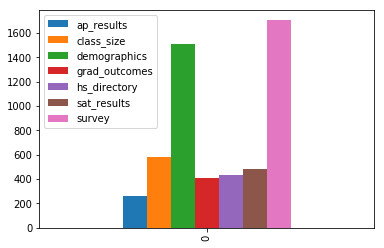

In [66]:
DBN_counts = {}
for key, value in data.items():
    DBN_counts[key] = value.shape[0]
DBN_df = pd.DataFrame(DBN_counts, index=[0])
DBN_df.plot.bar()

We will first merge "sat_results" with the dataframes "ap_results", "grad_outcomes", and "hs_directory". We can see that all of the dataframes to be merged have less 'DBN' values than "sat_results". So we'll use a left join so that all of the DBN values in "sat_results" are retained.

In [67]:
combined = data["sat_results"]

combined = combined.merge(data["ap_results"], on="DBN", how="left")
combined = combined.merge(data["grad_outcomes"], on="DBN", how="left")
combined = combined.merge(data["hs_directory"], on="DBN", how="left")

We will now merge the "combined" dataframe with the dataframes "class_size", "demographics", and "survey". Here we can see that all of the dataframes to be merged have more 'DBN' values than "combined". So now we'll use an inner join so that only the DBN values common to both the "combined" dataframe and the dataframes to be merged are used.

In [68]:
to_merge = ["class_size", "demographics", "survey"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

In [69]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Score Avg.,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,Cohort,Total Cohort,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,1122.0,NaN,NaN,NaN,Total Cohort,2006,78.0,...,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,1172.0,39,49,10,Total Cohort,2006,124.0,...,6.6,7.3,6.0,5.7,6.3,7.0,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,1149.0,19,21,s,Total Cohort,2006,90.0,...,8.0,8.8,NaN,NaN,NaN,NaN,7.9,7.9,7.9,8.4
3,01M458,FORSYTH SATELLITE ACADEMY,7,1174.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.9,8.9,6.8,6.1,6.1,6.8,7.8,7.1,7.2,7.8
4,01M509,MARTA VALLE HIGH SCHOOL,44,1207.0,NaN,NaN,NaN,Total Cohort,2006,84.0,...,6.1,6.8,6.4,5.9,6.4,7.0,6.9,6.2,6.6,7.0


***

# COMBINED DATA PREPARATION<a id='prepare_combined'></a>

In [70]:
col_info(combined.select_dtypes(include='object'), truncate=True)

The full dataset contains: 434 rows and 37 columns. Details for the requested column(s) are as follows:

 DBN : object : 434 levels
['01M292', '01M448', '01M450', '01M458', '01M509', '01M515', '01M539', '01M650'] ...

 SCHOOL NAME : object : 434 levels
['HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES'] ...

 Num of SAT Test Takers : object : 174 levels
['29', '91', '70', '7', '44', '112', '159', '18', '130', '16', '62', '53'] ...

 AP Test Takers  : object : 137 levels
[nan, '39', '19', '24', '255', 's', '21', '99', '42', '25', '213', '20'] ...

 Total Exams Taken : object : 150 levels
[nan, '49', '21', '26', '377', 's', '117', '44', '37', '298', '20', '115'] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


# Data Replacement<a id='replace_combined'></a>

We can see that there are quite a few columns in "combined" such as 'Total Grads - % of cohort' which are actually float type but are stored as object type and have a % suffix. We need to remove the % sign from the number-like value string to ensure that data conversion afterwards is successful.

Let's get a list of all the column names we need.

In [71]:
combined.filter(regex='.+%.+').columns

Index(['Total Grads - % of cohort', 'Total Regents - % of cohort',
       'Total Regents - % of grads', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - % of cohort',
       'Dropped Out - % of cohort', 'grade9-12 - % of Total Enrollment'],
      dtype='object')

Before removing the % sign from the values of each of the above columns however, we must also ensure that all are stored as string type.

In [72]:
cols = ['Total Grads - % of cohort', 'Total Regents - % of cohort', 'Total Regents - % of grads', 
        'Advanced Regents - % of cohort', 'Advanced Regents - % of grads', 'Regents w/o Advanced - % of cohort', 
       'Regents w/o Advanced - % of grads', 'Local - % of cohort', 'Local - % of grads', 
        'Still Enrolled - % of cohort', 'Dropped Out - % of cohort']
for col in cols:
    combined[col] = combined[col].astype('str')
    combined[col] = combined[col].map(lambda x: x.rstrip('%'))

# Initial Data Conversion<a id='initial_convert_combined'></a>

Let's make a list of all columns in our combined dataset that consist of numerical data but are stored as object type.

In [73]:
col_info(combined.select_dtypes(include='object'), truncate=True)

The full dataset contains: 434 rows and 37 columns. Details for the requested column(s) are as follows:

 DBN : object : 434 levels
['01M292', '01M448', '01M450', '01M458', '01M509', '01M515', '01M539', '01M650'] ...

 SCHOOL NAME : object : 434 levels
['HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES'] ...

 Num of SAT Test Takers : object : 174 levels
['29', '91', '70', '7', '44', '112', '159', '18', '130', '16', '62', '53'] ...

 AP Test Takers  : object : 137 levels
[nan, '39', '19', '24', '255', 's', '21', '99', '42', '25', '213', '20'] ...

 Total Exams Taken : object : 150 levels
[nan, '49', '21', '26', '377', 's', '117', '44', '37', '298', '20', '115'] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


In [74]:
to_num_cols = ['Num of SAT Test Takers', 'AP Test Takers ', 'Total Exams Taken', 
               'Number of Exams with scores 3 4 or 5', 
               'Total Cohort', 'Total Grads - n', 'Total Grads - % of cohort',
               'Total Regents - % of cohort', 'Total Regents - % of grads', 
               'Advanced Regents - % of cohort', 'Advanced Regents - % of grads', 
               'Regents w/o Advanced - % of cohort', 'Regents w/o Advanced - % of grads', 
               'Local - % of cohort', 'Local - % of grads', 
               'Still Enrolled - % of cohort', 
               'Dropped Out - % of cohort']
for col in to_num_cols:
    combined[col] = pd.to_numeric(combined[col], errors="coerce").round(1)

# Redundant Data<a id='redundant_combined'></a>

In [75]:
col_info(combined, truncate=True)

The full dataset contains: 434 rows and 80 columns. Details for the requested column(s) are as follows:

 DBN : object : 434 levels
['01M292', '01M448', '01M450', '01M458', '01M509', '01M515', '01M539', '01M650'] ...

 SCHOOL NAME : object : 434 levels
['HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES'] ...

 Num of SAT Test Takers : float64 : 174 levels
[29.0, 91.0, 70.0, 7.0, 44.0, 112.0, 159.0, 18.0, 130.0, 16.0, 62.0] ...

 SAT Score Avg. : float64 : 266 levels
[1122.0, 1172.0, 1149.0, 1174.0, 1207.0, 1205.0, 1621.0, 1246.0] ...

 AP Test Takers  : float64 : 136 levels
[nan, 39.0, 19.0, 24.0, 255.0, 21.0, 99.0, 42.0, 25.0, 213.0, 20.0, 78.0] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


From the column info above, we can see that there are two columns which seem to contain the same information. These columns and the individual datasets they came from are as follows:

- column 'total_students' : from dataset "hs_directory"
- column 'total_enrollment' : from dataset "demographics"

So let's filter the combined dataset to include only these columns and then have a look at it more closely.

In [76]:
students = combined[['total_students', 'total_enrollment']]
students.head(10)

,total_students,total_enrollment
0,323.0,422
1,299.0,394
2,649.0,598
3,NaN,224
4,401.0,367
5,NaN,562
6,1725.0,1613
7,NaN,218
8,560.0,617
9,184.0,174


We can see that even though both these columns contain the same information, there is some difference between the values of both as they come from different sources. The first column 'total_students' however seems to have some missing data. Because we are not sure as to which of these columns is more reliable, let's arbitrarily drop the one with the more missing values.

In [77]:
display(combined['total_students'].isna().sum(), combined['total_enrollment'].isna().sum())

72

0

In [78]:
combined.drop('total_students', axis=1, inplace=True)

# Missing Data<a id='missing_combined'></a>

In [79]:
missing_counts = combined.isna().sum().sort_values()
missing_one_plus = missing_counts[missing_counts >=1]

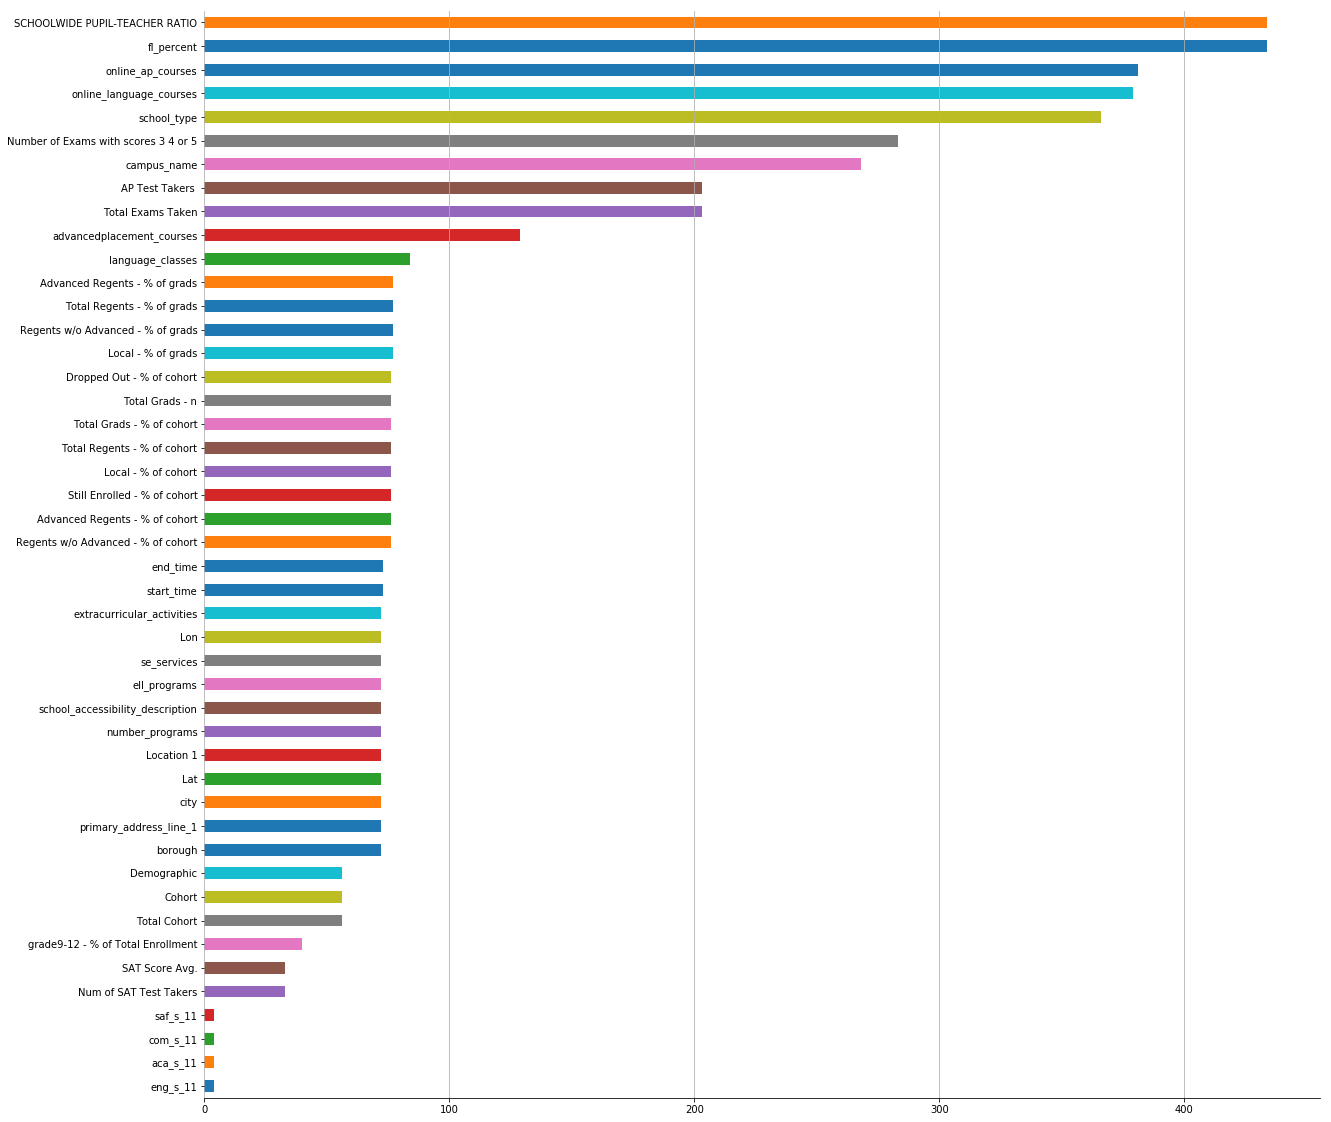

In [80]:
fig, ax = plt.subplots(figsize=(20,20))
ax = missing_one_plus.plot(kind='barh', xticks=[0,100,200,300,400])
plt.grid(axis='x')
sns.despine(left=True, bottom=False)

We can see that there are ten columns for which the number of missing values is very high. Since these columns are not useful in further analysis anyway, let's drop them.

In [81]:
cols_to_drop = ['SCHOOLWIDE PUPIL-TEACHER RATIO', 'fl_percent', 'online_ap_courses', 'online_language_courses', 
                'school_type', 'Number of Exams with scores 3 4 or 5', 'campus_name', 'AP Test Takers ', 
                'Total Exams Taken', 'advancedplacement_courses']
combined.drop(cols_to_drop, axis=1, inplace=True)

Since we now have columns with less than 100 missing values, we can now go ahead and impute the missing values for a particular column with the mean value for that column.

In [82]:
combined = combined.fillna(combined.mean()) # for numerical columns
combined = combined.fillna(0) # for categorical columns
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Score Avg.,Demographic,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - % of cohort,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,1122.0,Total Cohort,2006,78.000000,43.00000,55.100000,46.200000,...,6.1,6.5,6.000000,5.600000,6.100000,6.700000,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,1172.0,Total Cohort,2006,124.000000,53.00000,42.700000,33.900000,...,6.6,7.3,6.000000,5.700000,6.300000,7.000000,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,70.0,1149.0,Total Cohort,2006,90.000000,70.00000,77.800000,74.400000,...,8.0,8.8,6.651395,6.116977,6.647209,7.386047,7.9,7.9,7.9,8.4
3,01M458,FORSYTH SATELLITE ACADEMY,7.0,1174.0,0,0,188.796296,129.23743,63.800838,50.570391,...,8.9,8.9,6.800000,6.100000,6.100000,6.800000,7.8,7.1,7.2,7.8
4,01M509,MARTA VALLE HIGH SCHOOL,44.0,1207.0,Total Cohort,2006,84.000000,47.00000,56.000000,47.600000,...,6.1,6.8,6.400000,5.900000,6.400000,7.000000,6.9,6.2,6.6,7.0


Let's confirm that there are no more missing values in our "combined" dataset.

In [83]:
len(combined.isna().sum()[combined.isna().sum() >= 1])

0

# Final Data Conversion<a id='final_convert_combined'></a>

Now that we have dealt with missing data, we can now go ahead and convert columns that are stored as float type (but contain counts) into integer type.

## Convert to Integer<a id='convert_int_combined'></a>

In [84]:
col_info(combined.select_dtypes(include='float'), truncate=True)

The full dataset contains: 434 rows and 50 columns. Details for the requested column(s) are as follows:

 Num of SAT Test Takers : float64 : 174 levels
[29.0, 91.0, 70.0, 7.0, 44.0, 112.0, 159.0, 18.0, 130.0, 16.0, 62.0] ...

 SAT Score Avg. : float64 : 266 levels
[1122.0, 1172.0, 1149.0, 1174.0, 1207.0, 1205.0, 1621.0, 1246.0] ...

 Total Cohort : float64 : 196 levels
[78.0, 124.0, 90.0, 188.7962962962963, 84.0, 193.0, 46.0, 89.0] ...

 Total Grads - n : float64 : 181 levels
[43.0, 53.0, 70.0, 129.23743016759778, 47.0, 105.0, 46.0, 49.0] ...

 Total Grads - % of cohort : float64 : 273 levels
[55.1, 42.7, 77.8, 63.800837988826835, 56.0, 54.4, 100.0, 96.4] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


In [85]:
to_int_cols = ['Num of SAT Test Takers', 'SAT Score Avg.', 'Total Cohort', 'Total Grads - n', 'number_programs', 
               'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS', 'AVERAGE CLASS SIZE', 
               'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS', 'rr_s']
combined[to_int_cols].head()

,Num of SAT Test Takers,SAT Score Avg.,Total Cohort,Total Grads - n,number_programs,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,rr_s
0,29.0,1122.0,78.000000,43.00000,1.000000,88.000000,4.000000,22.564286,18.50,26.571429,89.0
1,91.0,1172.0,124.000000,53.00000,3.000000,105.687500,4.750000,22.231250,18.25,27.062500,84.0
2,70.0,1149.0,90.000000,70.00000,1.000000,57.600000,2.733333,21.200000,19.40,22.866667,0.0
3,7.0,1174.0,188.796296,129.23743,1.837017,28.600000,1.200000,23.000000,22.60,23.400000,40.0
4,44.0,1207.0,84.000000,47.00000,1.000000,69.642857,3.000000,23.571429,20.00,27.357143,90.0


In [86]:
combined.loc[:,to_int_cols] = np.int64(combined.loc[:,to_int_cols])
combined[to_int_cols].head()

,Num of SAT Test Takers,SAT Score Avg.,Total Cohort,Total Grads - n,number_programs,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,rr_s
0,29,1122,78,43,1,88,4,22,18,26,89
1,91,1172,124,53,3,105,4,22,18,27,84
2,70,1149,90,70,1,57,2,21,19,22,0
3,7,1174,188,129,1,28,1,23,22,23,40
4,44,1207,84,47,1,69,3,23,20,27,90


## Round off Float<a id='round_float_combined'></a>

In [87]:
col_info(combined.select_dtypes(include='float'), truncate=True)

The full dataset contains: 434 rows and 39 columns. Details for the requested column(s) are as follows:

 Total Grads - % of cohort : float64 : 273 levels
[55.1, 42.7, 77.8, 63.800837988826835, 56.0, 54.4, 100.0, 96.4] ...

 Total Regents - % of cohort : float64 : 279 levels
[46.2, 33.9, 74.4, 50.57039106145252, 47.6, 47.2, 100.0, 40.4] ...

 Total Regents - % of grads : float64 : 230 levels
[83.7, 79.2, 95.7, 75.32212885154064, 85.1, 86.7, 100.0, 73.5] ...

 Advanced Regents - % of cohort : float64 : 172 levels
[0.0, 6.5, 12.212569832402236, 20.2, 35.8, 67.4, 1.3, 42.4, 1.5, 11.1] ...

 Advanced Regents - % of grads : float64 : 199 levels
[0.0, 15.1, 15.606442577030801, 36.2, 65.7, 67.4, 1.7, 50.0, 2.2] ...

... OUTPUT TRUNCATED ... remove truncate=True to display info about all columns


Finally let's round off the values of all float type columns expect 'Lat' and 'Lon' to a single digit after decimal point. For the 'Lat' and 'Lon' columns, we will round off to 4 digits after decimal point for greater precision.

Let's get a list of all the column names we need to work with.

In [88]:
combined.select_dtypes(include='float').columns

Index(['Total Grads - % of cohort', 'Total Regents - % of cohort',
       'Total Regents - % of grads', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - % of cohort',
       'Dropped Out - % of cohort', 'Lat', 'Lon', 'frl_percent', 'ell_percent',
       'sped_percent', 'asian_per', 'black_per', 'hispanic_per', 'white_per',
       'male_per', 'female_per', 'grade9-12 - % of Total Enrollment',
       'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11',
       'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11',
       'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11'],
      dtype='object')

In [89]:
cols_to_round = ['Total Grads - % of cohort', 'Total Regents - % of cohort',
       'Total Regents - % of grads', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - % of cohort',
       'Dropped Out - % of cohort', 'Lat', 'Lon', 'frl_percent', 'ell_percent',
       'sped_percent', 'asian_per', 'black_per', 'hispanic_per', 'white_per',
       'male_per', 'female_per', 'saf_p_11', 'com_p_11', 'eng_p_11',
       'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11',
       'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11',
       'eng_tot_11', 'aca_tot_11']
combined[cols_to_round].head()

,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,55.100000,46.200000,83.700000,0.00000,0.000000,46.200000,83.700000,9.000000,16.300000,20.500000,...,6.1,6.5,6.000000,5.600000,6.100000,6.700000,6.7,6.2,6.6,7.0
1,42.700000,33.900000,79.200000,6.50000,15.100000,27.400000,64.200000,8.900000,20.800000,37.100000,...,6.6,7.3,6.000000,5.700000,6.300000,7.000000,6.8,6.3,6.7,7.2
2,77.800000,74.400000,95.700000,0.00000,0.000000,74.400000,95.700000,3.300000,4.300000,16.700000,...,8.0,8.8,6.651395,6.116977,6.647209,7.386047,7.9,7.9,7.9,8.4
3,63.800838,50.570391,75.322129,12.21257,15.606443,38.356425,59.715686,13.231285,24.678431,23.112849,...,8.9,8.9,6.800000,6.100000,6.100000,6.800000,7.8,7.1,7.2,7.8
4,56.000000,47.600000,85.100000,20.20000,36.200000,27.400000,48.900000,8.300000,14.900000,29.800000,...,6.1,6.8,6.400000,5.900000,6.400000,7.000000,6.9,6.2,6.6,7.0


In [90]:
for col in cols_to_round:
    if ((col == 'Lat') | (col == 'Lon')):
        combined[col] = combined[col].round(4)
    else:
        combined[col] = combined[col].round(1)
combined[cols_to_round].head()  

,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,55.1,46.2,83.7,0.0,0.0,46.2,83.7,9.0,16.3,20.5,...,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0
1,42.7,33.9,79.2,6.5,15.1,27.4,64.2,8.9,20.8,37.1,...,6.6,7.3,6.0,5.7,6.3,7.0,6.8,6.3,6.7,7.2
2,77.8,74.4,95.7,0.0,0.0,74.4,95.7,3.3,4.3,16.7,...,8.0,8.8,6.7,6.1,6.6,7.4,7.9,7.9,7.9,8.4
3,63.8,50.6,75.3,12.2,15.6,38.4,59.7,13.2,24.7,23.1,...,8.9,8.9,6.8,6.1,6.1,6.8,7.8,7.1,7.2,7.8
4,56.0,47.6,85.1,20.2,36.2,27.4,48.9,8.3,14.9,29.8,...,6.1,6.8,6.4,5.9,6.4,7.0,6.9,6.2,6.6,7.0


Finally, we have our "combined" dataset in a clean form and good shape.

# Rename Columns<a id='rename_cols_combined'></a>

We can now rename all the columns to some meaningful names that can be understood right away without looking into the metadata Excel files for each of the individual datasets the columns came from. For example 'com_p_11' doesn't indicate what the column is about but 'Communication Score - Parents' does.

In [91]:
combined.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers', 'SAT Score Avg.',
       'Demographic', 'Cohort', 'Total Cohort', 'Total Grads - n',
       'Total Grads - % of cohort', 'Total Regents - % of cohort',
       'Total Regents - % of grads', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - % of cohort',
       'Dropped Out - % of cohort', 'borough', 'primary_address_line_1',
       'city', 'language_classes', 'extracurricular_activities', 'start_time',
       'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'Location 1',
       'Lat', 'Lon', 'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'schoolyear', 'frl_percent', 'total_enrollment', 'ell_percent',
       

In [92]:
rename_dict = {'SCHOOL NAME': 'School Name', 'Total Grads - n': 'Total Grads', 
               'Total Grads - % of cohort': 'Total Grads - % of Cohort', 
               'Total Regents - % of cohort': 'Total Regents - % of Cohort', 
               'Total Regents - % of grads': 'Total Regents - % of Grads',  
               'Advanced Regents - % of cohort': 'Advanced Regents - % of Cohort', 
               'Advanced Regents - % of grads': 'Advanced Regents - % of Grads', 
               'Regents w/o Advanced - % of cohort': 'Non-Advanced Regents - % of Cohort', 
               'Regents w/o Advanced - % of grads': 'Non-Advanced Regents - % of Grads', 
               'Local - % of cohort': 'Local - % of Cohort', 'Local - % of grads': 'Local - % of Grads', 
               'Still Enrolled - % of cohort': 'Still Enrolled - % of Cohort', 
               'Dropped Out - % of cohort': 'Dropped Out - % of Cohort', 
               'borough': 'Borough', 'primary_address_line_1': 'Address', 'city': 'City', 
               'language_classes': 'Language Classes', 'extracurricular_activities': 'Extracurricular Activities', 
               'start_time': 'Start Time', 'end_time': 'End Time', 'se_services': 'Special Education Services', 
               'ell_programs': 'English Language Learners Programs', 
               'school_accessibility_description': 'Accessibility', 'number_programs': 'Number of Programs', 
               'Location 1': 'Location', 'Lat': 'Latitude', 'Lon': 'Longitude', 
               'NUMBER OF STUDENTS / SEATS FILLED': 'Number of Students/Seats Filled', 
               'NUMBER OF SECTIONS': 'Number of Sections', 'AVERAGE CLASS SIZE': 'Average Class Size', 
               'SIZE OF SMALLEST CLASS': 'Smallest Class Size', 'SIZE OF LARGEST CLASS': 'Largest Class Size', 
               'schoolyear': 'School Year', 'frl_percent': 'Free and Reduced Lunch %', 
               'total_enrollment': 'Total Enrollment', 'ell_percent': 'English Language Learners %', 
               'sped_percent': 'Special Education %', 'asian_per': 'Asian %', 'black_per': 'Black %', 
               'hispanic_per': 'Hispanic %', 'white_per': 'White %', 'male_per': 'Male %', 
               'female_per': 'Female %', 
               'rr_s': 'Survey Response Rate - Students', 'rr_t': 'Survey Response Rate - Teachers', 
               'rr_p': 'Survey Response Rate - Parents', 
               'saf_p_11': 'Safety Score - Parents', 'com_p_11': 'Communication Score - Parents', 
               'eng_p_11': 'Engagement Score - Parents', 'aca_p_11': 'Academic Score - Parents', 
               'saf_t_11': 'Safety Score - Teachers', 'com_t_11': 'Communication Score - Teachers', 
               'eng_t_11': 'Engagement Score - Teachers', 'aca_t_11': 'Academic Score - Teachers', 
               'saf_s_11': 'Safety Score - Students', 'com_s_11': 'Communication Score - Students', 
               'eng_s_11': 'Engagement Score - Students', 'aca_s_11': 'Academic Score - Students', 
               'saf_tot_11': 'Safety Score - Total', 'com_tot_11': 'Communication Score - Total', 
               'eng_tot_11': 'Engagement Score - Total', 'aca_tot_11': 'Academic Score - Total'}

In [93]:
combined.rename(rename_dict, axis=1, inplace=True)

In [94]:
combined.head()

,DBN,School Name,Num of SAT Test Takers,SAT Score Avg.,Demographic,Cohort,Total Cohort,Total Grads,Total Grads - % of Cohort,Total Regents - % of Cohort,...,Engagement Score - Teachers,Academic Score - Teachers,Safety Score - Students,Communication Score - Students,Engagement Score - Students,Academic Score - Students,Safety Score - Total,Communication Score - Total,Engagement Score - Total,Academic Score - Total
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,1122,Total Cohort,2006,78,43,55.1,46.2,...,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,1172,Total Cohort,2006,124,53,42.7,33.9,...,6.6,7.3,6.0,5.7,6.3,7.0,6.8,6.3,6.7,7.2
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,1149,Total Cohort,2006,90,70,77.8,74.4,...,8.0,8.8,6.7,6.1,6.6,7.4,7.9,7.9,7.9,8.4
3,01M458,FORSYTH SATELLITE ACADEMY,7,1174,0,0,188,129,63.8,50.6,...,8.9,8.9,6.8,6.1,6.1,6.8,7.8,7.1,7.2,7.8
4,01M509,MARTA VALLE HIGH SCHOOL,44,1207,Total Cohort,2006,84,47,56.0,47.6,...,6.1,6.8,6.4,5.9,6.4,7.0,6.9,6.2,6.6,7.0


# Create School District Column<a id='create_col_combined'></a>

Finally, let's create a School District column for mapping.

In [95]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["School_Dist"] = combined["DBN"].apply(get_first_two_chars)

Now let's go ahead and use the combined dataset to investigate the correlations between SAT scores and demographics. It is possible to correlate SAT scores with a number of variables in our combined dataset such as race, gender, income etc. We can then, for example, draw conclusions as to whether there is some linkage between SAT scores and a particular race to indicate that the test may be unfair to other racial groups.

# FIND CORRELATIONS<a id='find_corr'></a>

In [96]:
correlations = combined.corr()
display(correlations.head(3))
correlations = correlations['SAT Score Avg.'].sort_values() # filter and sort only the correlations with 'SAT Score'

,Num of SAT Test Takers,SAT Score Avg.,Total Cohort,Total Grads,Total Grads - % of Cohort,Total Regents - % of Cohort,Total Regents - % of Grads,Advanced Regents - % of Cohort,Advanced Regents - % of Grads,Non-Advanced Regents - % of Cohort,...,Engagement Score - Teachers,Academic Score - Teachers,Safety Score - Students,Communication Score - Students,Engagement Score - Students,Academic Score - Students,Safety Score - Total,Communication Score - Total,Engagement Score - Total,Academic Score - Total
Num of SAT Test Takers,1.000000,0.493667,0.880386,0.949215,0.251916,0.305365,0.289913,0.455588,0.494802,-0.083287,...,0.076639,0.076998,0.014627,-0.111044,-0.004708,-0.007615,-0.016208,-0.063675,-0.003138,-0.031803
SAT Score Avg.,0.493667,1.000000,0.307629,0.428992,0.519926,0.619951,0.457077,0.772167,0.735614,-0.008301,...,0.041864,0.124105,0.272855,0.149425,0.166715,0.281779,0.275959,0.076506,0.086737,0.167127
Total Cohort,0.880386,0.307629,1.000000,0.934568,0.044311,0.085513,0.147162,0.257968,0.325113,-0.160568,...,0.056051,0.034276,-0.108509,-0.196647,-0.085424,-0.138823,-0.158611,-0.125020,-0.067058,-0.124485


The following table shows that a correlation can be __weak__, __moderate__, or __strong__ based on the value of __r__.

    weak correlation    moderate correlation    strong correlation   
    0 < |r| < 0.3       0.3 < |r| < 0.7         |r| > 0.7           

## Correlations Plots<a id='corr_plots'></a>

Let's filter the positive and negative correlations first and we'll then plot them one by one.

In [97]:
pos_corr = correlations[correlations >= 0]
neg_corr = correlations[correlations < 0]

### Positive Correlations Plot<a id='pos_corr_plot'></a>

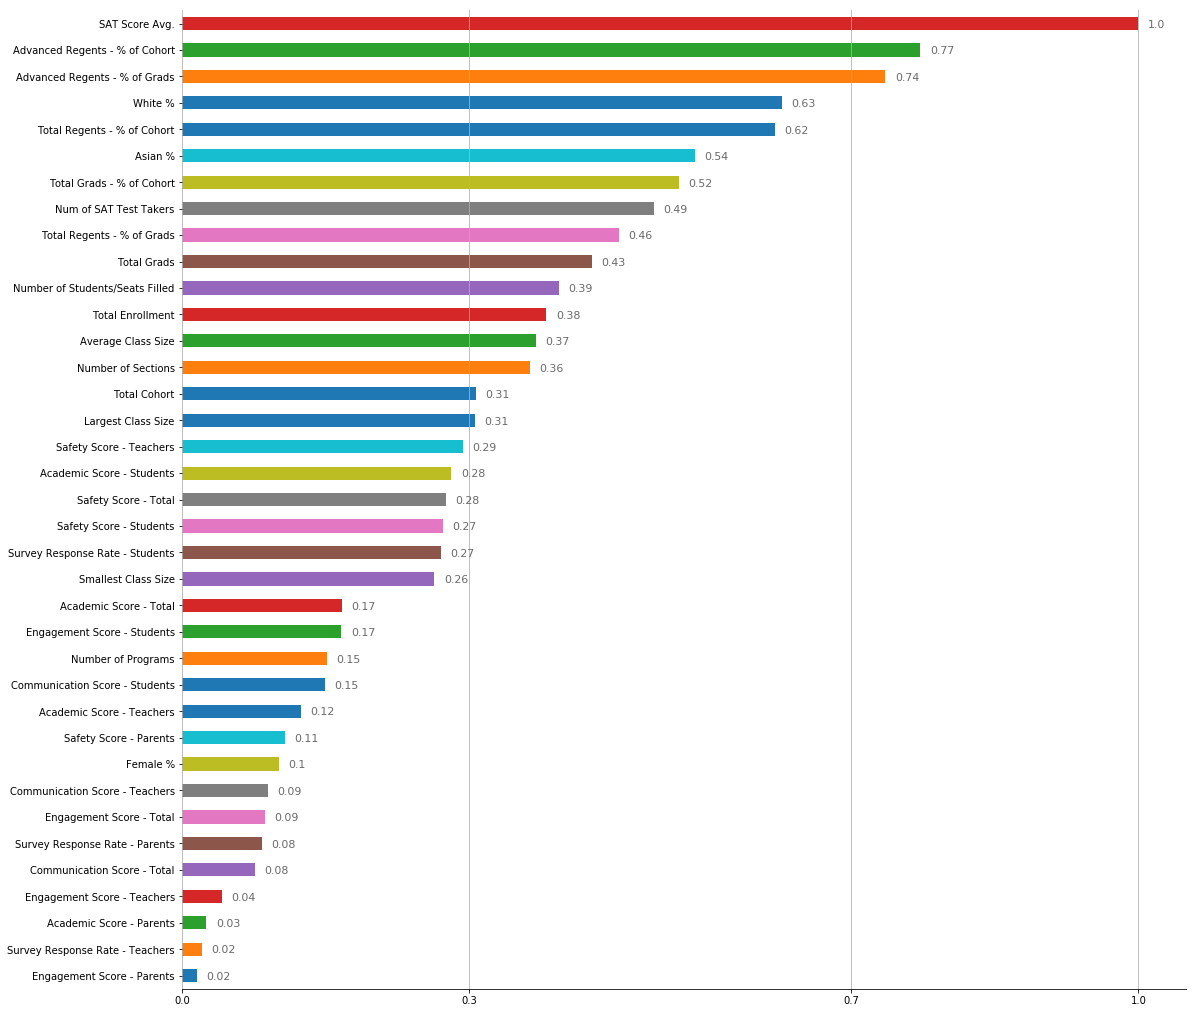

In [98]:
fig, ax = plt.subplots(figsize=(18,18))
ax = pos_corr.plot(kind='barh', xticks=[0,0.3,0.7,1]) # Series.plot
# for each of the bars in axis
for bar in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(bar.get_width()+.01, bar.get_y()+.1, str(round(bar.get_width(), 2)), fontsize=11, color='dimgrey')
plt.grid(axis='x')
sns.despine(left=True, bottom=False)

### Negative Correlations Plot<a id='neg_corr_plot'></a>

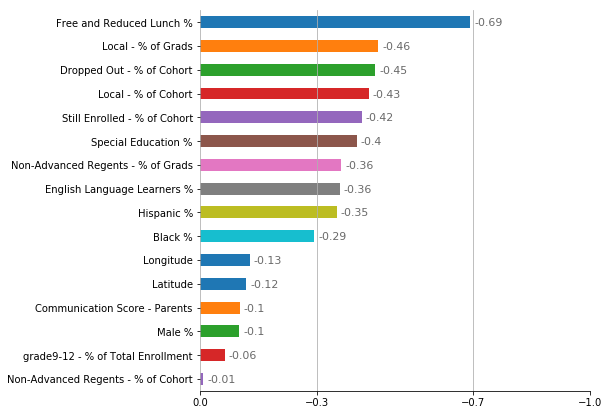

In [99]:
fig, ax = plt.subplots(figsize=(7,7))
ax = neg_corr.plot(kind='barh', xticks=[0,-0.3,-0.7,-1]) # Series.plot
# for each of the bars in axis
for bar in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(bar.get_width()-.01, bar.get_y()+.4, str(round(bar.get_width(), 2)), fontsize=11, color='dimgrey')
plt.grid(axis='x')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
sns.despine(left=True, bottom=False)

## Correlations Analysis<a id='corr_analysis'></a>

From the above correlations plots, we can conclude the following:

__1. SAT Score has strong positive correlation with the percentage of Advanced Regents Examinees at a School__

In New York State, Regents Examinations are statewide standardized examinations in core high school subjects required for a certain Regents Diploma to graduate. For higher achieving students, a Regents with Advanced designation, and an Honor designation, are also offered. 

We can see from the positive correlations plot that both 'Advanced Regents - % of Cohort' and 'Advanced Regents - % of Grads' have a strong positive correlation with SAT Score. This means that the higher the percentage of students in a school who take Advanced Regents Exams, the higher the SAT Score Avg. for that school. This hardly comes as a surprise as students who take the Advanced Regents Exams are obviously higher achieving students and are in a much better position to score highly on the SAT test as well.

__2. SAT Score has moderate negative correlation with the percentage of Grad Non-Advanced Regents Examinees at a School__

This means that as the percentage of Grad students taking Non-Advanced Regents Exams at a school increases, the SAT Score Avg. for that school tends to decrease. This is interesting as it is somewhat in contrast with point number 1.

__3. SAT Score has moderate positive correlation with the percentage of White Students at a School__

The higher the percentage of White students studying in a school, the higher the SAT Score for that school. This seems to have a strong racial connotation. However, on a closer look, we can see that the percentage of Asian students is also moderately correlated with SAT Score, albeit not as strongly as that for White students. And this may dispel the idea that a particular race tends to do better on SAT scores. This is further established by the fact that the percentages of Hispanic and Black students also have only a weak negative correlation with the Avg. SAT score.

__4. SAT Score has moderate positive correlation with the Number of SAT Test Takers at a School__

The higher the number of SAT test takers at a school, the higher the SAT Score Avg. for that school. This implies that as the number of SAT test takers at a school increases, each individual student tends to score relatively higher which in turn leads to a higher SAT Score Avg. for that school.

__5. SAT Score has moderate positive correlation with Avg. Class Size at a School__

As the average class size at a school increases, SAT Score Avg. also tends to increase for that school. This seems a bit counter-intuitive on a first glance. This is because as the number of students in a class increases, each student is supposed to get less personalized attention and care from the teacher which should lead to lower SAT scores. However it may be that SAT score depends on the independent effort of each individual student and has little to do with class attention and guidance received from the teacher.

__6. SAT Score has weak positive/negative correlation with the percentages of Female/Male students at a School__

Even though the correlations are weak, this may imply that females in general tend to perform better on the SAT exam as compared with males.